In [1]:
import pandas as pd
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
import re
import sklearn
from sklearn.model_selection import train_test_split
import tqdm
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.pipeline import make_pipeline
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Conv1D, Concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense, Embedding, Input,BatchNormalization
from tensorflow.keras.models import Model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohanty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)

In [3]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data = data[[5, 0]]
data.columns=['tweet', 'sentiment']

In [5]:
data['sentiment'] = data['sentiment'].replace(4,1)

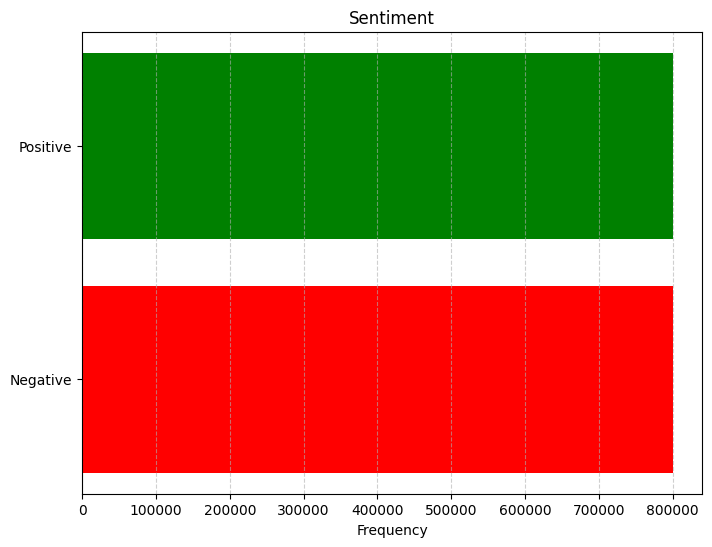

In [6]:
plt.rcParams['font.family'] = 'DejaVu Sans'
sentiment_counts = data['sentiment'].value_counts()
sentiment_labels = {'Negative': 0, 'Positive': 1}
plt.figure(figsize=(8, 6))
plt.barh(list(sentiment_labels.keys()), list(sentiment_counts.values), color=['red', 'green', 'blue'])
plt.xlabel("Frequency")
plt.yticks(list(sentiment_labels.values()), list(sentiment_labels.keys()))
plt.title("Sentiment")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

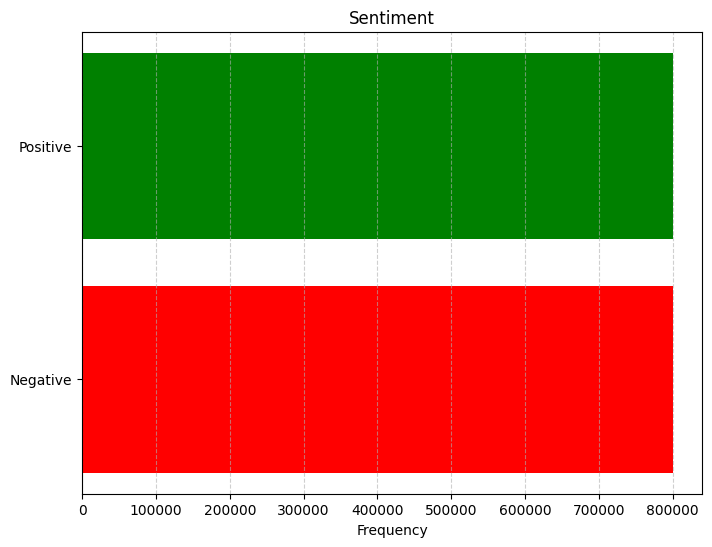

In [7]:
plt.rcParams['font.family'] = 'DejaVu Sans'
sentiment_counts = data['sentiment'].value_counts()
sentiment_labels = {'Negative': 0, 'Positive': 1}
plt.figure(figsize=(8, 6))
plt.barh(list(sentiment_labels.keys()), list(sentiment_counts.values), color=['red', 'green', 'blue'])
plt.xlabel("Frequency")
plt.yticks(list(sentiment_labels.values()), list(sentiment_labels.keys()))
plt.title("Sentiment")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


In [8]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = re.sub(r"https?://\S+|www\.\S+"," ",text)
    text = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\w*\d\w*", " ", text)
    text = re.sub(r"[0-9]+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
        
    text = text.lower()
    
    tokens = []
    for token in text.split():
        if token not in stop_words and len(token) > 3:
            tokens.append(token)
    return " ".join(tokens)

In [9]:
data.loc[:, 'tweet'] = data['tweet'].apply(preprocess)

In [10]:
X = data['tweet']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 1280000 1280000
Test Data size 320000 320000


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
max_length = max([len(seq) for seq in X_train])
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
print(f"After padding: {X_train.shape}")
print(f"After padding:{X_test.shape}")

After padding: (1280000, 27)
After padding:(320000, 27)


In [13]:
batch_size=512
vocab_size = len(tokenizer.word_index)+1
embedding_dim = 100

In [14]:
CNN=models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.Dropout(0.5),
    
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'), 
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation='sigmoid')
])

CNN.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [15]:
history=CNN.fit(X_train, y_train, epochs=5,batch_size=batch_size)

Epoch 1/5
2500/2500 [==============================] - 3256s 1s/step - loss: 0.5043 - accuracy: 0.7517
Epoch 2/5
2500/2500 [==============================] - 3251s 1s/step - loss: 0.4156 - accuracy: 0.8123
Epoch 3/5
2500/2500 [==============================] - 3261s 1s/step - loss: 0.3480 - accuracy: 0.8453
Epoch 4/5
2500/2500 [==============================] - 3260s 1s/step - loss: 0.3106 - accuracy: 0.8610
Epoch 5/5
2500/2500 [==============================] - 3219s 1s/step - loss: 0.2893 - accuracy: 0.8707


In [16]:
CNN.evaluate(X_test, y_test)

10000/10000 [==============================] - 113s 11ms/step - loss: 0.8239 - accuracy: 0.7469


[0.8239432573318481, 0.7468906044960022]

In [17]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 100)           45102700  
                                                                 
 dropout (Dropout)           (None, 27, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 25, 256)           77056     
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 256)           196864    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

10000/10000 [==============================] - 107s 11ms/step


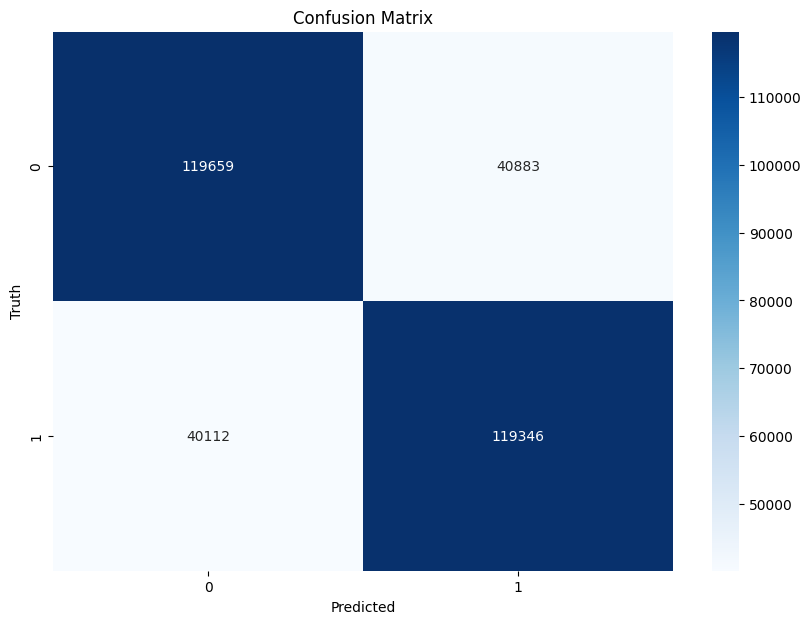

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
y_pred = CNN.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rounded, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.75      0.75      0.75    160542
    Positive       0.74      0.75      0.75    159458

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



In [20]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
embedding_layer = Embedding(vocab_size, 100, input_length=max_length, trainable=False)
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = Conv1D(64, 3, activation='relu', padding='same')(embedding_sequences)
x = Conv1D(64, 3, activation='relu', padding='same')(x)
x= MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = Conv1D(256, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=3, strides=1, padding='same')(x)

x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)
x = Conv1D(512, 3, activation='relu', padding='same')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model_vgg16 = Model(sequence_input, outputs)
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
loss, accuracy = model_vgg16.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10000/10000 [==============================] - 1624s 162ms/step - loss: 0.6932 - accuracy: 0.4996
Test Loss: 0.6932199597358704
Test Accuracy: 0.49962812662124634


In [22]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 27)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 27, 100)           45102700  
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 64)            19264     
                                                                 
 conv1d_3 (Conv1D)           (None, 27, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 27, 64)            0         
 D)                                                              
                                                                 
 conv1d_4 (Conv1D)           (None, 27, 128)           24704     
                                                             

In [23]:
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

l1 = Conv1D(64, 1, activation='relu', padding='same')(embedding_sequences)
l2 = Conv1D(64, 3, activation='relu', padding='same')(embedding_sequences)
l3 = Conv1D(64, 5, activation='relu', padding='same')(embedding_sequences)
l4 = Conv1D(64, 7, activation='relu', padding='same')(embedding_sequences)
l5 = Conv1D(64, 9, activation='relu', padding='same')(embedding_sequences)
l6 = MaxPooling1D(pool_size=3, strides=1, padding='same')(embedding_sequences)
l6 = Conv1D(64, 1, activation='relu', padding='same')(l6)

l = Concatenate(axis=-1)([l1, l2, l3, l4, l5, l6])
l = Flatten()(l)
l = Dense(512, activation='relu')(l)
l = Dense(512, activation='relu')(l)

outputs = Dense(1, activation='sigmoid')(l)

model_inception = Model(sequence_input, outputs)

model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model_inception.fit(X_train, y_train, batch_size=64, epochs=1)

20000/20000 [==============================] - 3699s 185ms/step - loss: 0.5393 - accuracy: 0.7213


In [26]:
loss, accuracy = model_inception.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10000/10000 [==============================] - 236s 24ms/step - loss: 0.5174 - accuracy: 0.7398
Test Loss: 0.5173718929290771
Test Accuracy: 0.7398218512535095


In [27]:
model_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 27)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 27, 100)              4510270   ['input_2[0][0]']             
                                                          0                                       
                                                                                                  
 max_pooling1d_4 (MaxPoolin  (None, 27, 100)              0         ['embedding_1[1][0]']         
 g1D)                                                                                             
                                                                                            

10000/10000 [==============================] - 213s 21ms/step


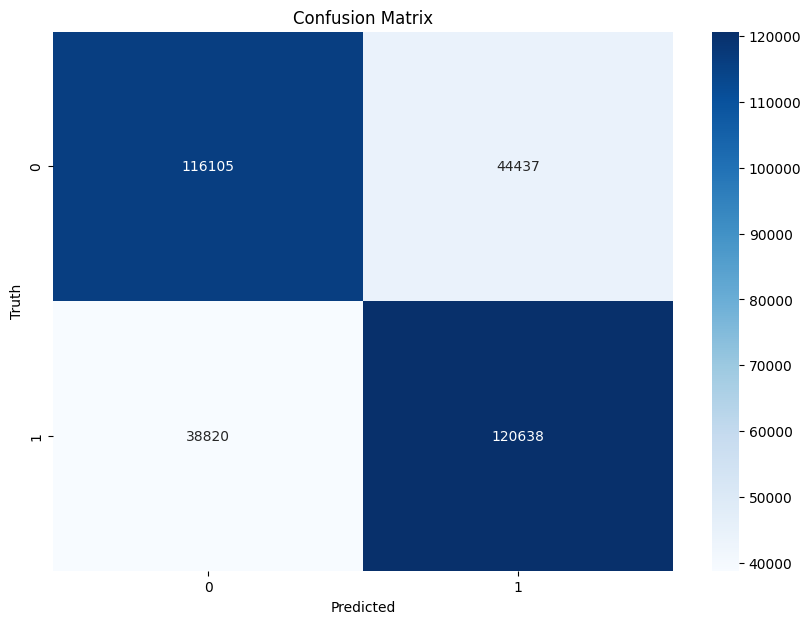

In [28]:
y_pred = model_inception.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rounded, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.74    160542
    Positive       0.73      0.76      0.74    159458

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



In [30]:
def predict_sentiments(model, tokenizer, data, num_samples=10):
    results = []
    for _ in range(num_samples):
        index = np.random.randint(0, len(data))
        tweet = data.iloc[index]['tweet']
        y_true = data.iloc[index]['sentiment']
        cleaned_tweet = preprocess(tweet)
        sequence = tokenizer.texts_to_sequences([cleaned_tweet])
        padded_sequence = pad_sequences(sequence, maxlen=max_length)
        prediction = model.predict(padded_sequence)[0][0]
        sentiment = "Positive" if prediction >= 0.5 else "Negative"
        results.append((tweet, sentiment, y_true))

    return results

results = predict_sentiments(CNN, tokenizer, data, num_samples=10)
for i, (tweet, sentiment, y_true) in enumerate(results, 1):
    print(f"Sample {i}:")
    print("Tweet:", tweet)
    print("Predicted Sentiment:", sentiment)
    print("True Sentiment:", "Positive" if y_true == 1 else "Negative")
    print()

1/1 [==============================] - 0s 47ms/step
Sample 1:
Tweet: talkin henry wonderful stories world
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 2:
Tweet: going trendingggg
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 3:
Tweet: jonasbrothers love guys best
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 4:
Tweet: psychobunny well
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 5:
Tweet: joshgroban josh reassuring planning flying asthma smog really
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 6:
Tweet: manox_net yeah happy innit still driver
Predicted Sentiment: Negative
True Sentiment: Negative

Sample 7:
Tweet: wait flip biology exam dead easy still addicted crush sums well
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 8:
Tweet: bella_butterfly woohoo thanks mandi
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 9:
Tweet: kikirowr want hippogryph pets
Predicted Sent